<a href="https://colab.research.google.com/github/juandsep/imbd_project/blob/master/Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Encoded_X.csv to Encoded_X.csv
Saving Encoded_y - rating.csv to Encoded_y - rating.csv


In [0]:
#Loading data from preprocessed CSVs
import io
# Importing the dataset
dataset_X_reimported  = pd.read_csv(io.BytesIO(uploaded['Encoded_X.csv']))
dataset_y_reimported  = pd.read_csv(io.BytesIO(uploaded["Encoded_y - rating.csv"]))
dataset_reimported = pd.concat([dataset_X_reimported,dataset_y_reimported],axis=1)

0.47807302738633406


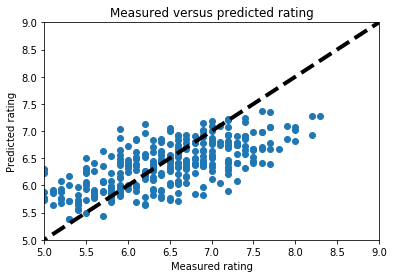

In [7]:
dataset_reimported = dataset_reimported.replace([np.inf, -np.inf], np.nan)
dataset_reimported = dataset_reimported.dropna() #just two rows are lost by dropping NaN values. Better than using mean here

X = dataset_reimported.iloc[:, 1:-2].values
y = dataset_reimported.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
# I have a fairly large dataset of +- 4000 entries, so I'm going with 10% test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

#This regressor was picked with gridsearch over many parameters - took 4 hours
from xgboost import XGBRegressor
regressor = XGBRegressor(colsample_bytree= 0.6, gamma= 0.7, max_depth= 4, min_child_weight= 5,
                         subsample = 0.8, objective='reg:squarederror')
regressor.fit(X, y)

y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred) 
print(score)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured rating')
ax.set_ylabel('Predicted rating')
plt.title('Measured versus predicted rating')
plt.ylim((5, 9))   # set the ylim to bottom, top
plt.xlim(5, 9)     # set the ylim to bottom, top
plt.show()